# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [10]:
import random
import pandas as pd

def simulate_dice_rolls():
    dice = [1, 2, 3, 4, 5, 6]  # possible outcomes of rolling a dice
    rolls = random.choices(dice, k=10)  # simulate rolling the dice 10 times
    
    data = {'Roll': range(1, 11), 'Outcome': rolls}
    df = pd.DataFrame(data)
    
    return df
simulate_dice_rolls()

,Roll,Outcome
0,1,3
1,2,5
2,3,1
3,4,3
4,5,4
5,6,3
6,7,4
7,8,3
8,9,5
9,10,2


#### 2.- Plot the results sorted by value.

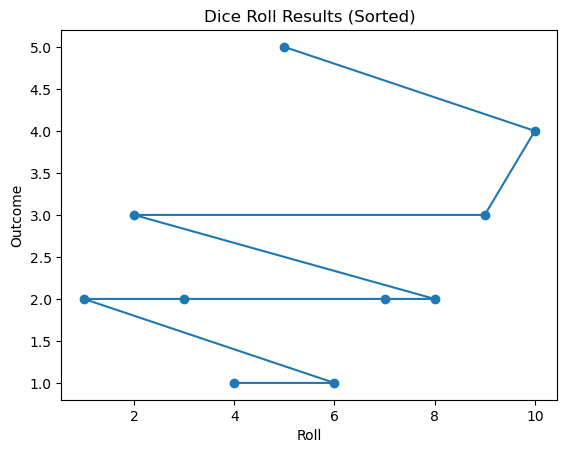

In [12]:
# Simulate dice rolls and obtain the dataframe
df = simulate_dice_rolls()

# Sort the dataframe by the 'Outcome' column
sorted_df = df.sort_values(by='Outcome')

# Plot the sorted results
plt.plot(sorted_df['Roll'], sorted_df['Outcome'], marker='o')
plt.xlabel('Roll')
plt.ylabel('Outcome')
plt.title('Dice Roll Results (Sorted)')
plt.show()


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

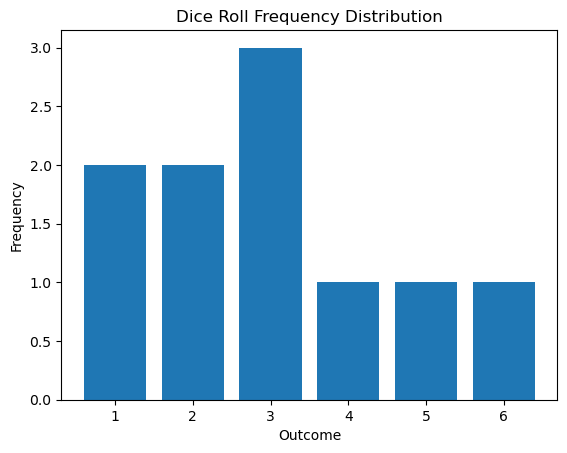

In [13]:
# Simulate dice rolls and obtain the dataframe
df = simulate_dice_rolls()

# Calculate the frequency distribution
freq_dist = df['Outcome'].value_counts()

# Plot the frequency distribution
plt.bar(freq_dist.index, freq_dist.values)
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Dice Roll Frequency Distribution')
plt.show()

In [ ]:
he first plot shows the sorted results of the dice rolls, where the x-axis represents the roll number and the y-axis represents the outcome value. Each point on the plot represents a single dice roll. The plot helps visualize the variation in outcomes across the 10 rolls.

The second plot, the frequency distribution plot, shows the distribution of outcomes across the 10 rolls. The x-axis represents the possible outcome values (1 to 6), and the y-axis represents the frequency of each outcome. Each bar on the plot represents the count of a specific outcome in the 10 rolls.

The relationship between the two plots is that the second plot (frequency distribution) provides a summary of the data shown in the first plot (sorted results). It shows how frequently each outcome occurred across the 10 rolls, providing an overview of the distribution of outcomes. The first plot gives a more detailed view of individual roll results, while the second plot provides an aggregated view of the frequencies of different outcomes.

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [15]:
def calculate_mean(data):
    total_sum = 0
    num_observations = len(data)

    for observation in data:
        total_sum += observation

    mean = total_sum / num_observations
    return mean

# Assuming df contains the dice roll results dataframe
data = df['Outcome']
mean = calculate_mean(data)
print("Mean:", mean)

Mean: 3.0


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [16]:
def calculate_mean_from_freq_dist(freq_dist):
    total_sum = 0
    num_observations = 0

    for value, frequency in freq_dist.items():
        total_sum += value * frequency
        num_observations += frequency

    mean = total_sum / num_observations
    return mean

# Assuming freq_dist is the frequency distribution obtained from the dice roll results
mean = calculate_mean_from_freq_dist(freq_dist)
print("Mean:", mean)

Mean: 3.0


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [20]:
def calculate_median(data):
    sorted_data = sorted(data)
    num_observations = len(sorted_data)
    
    if num_observations % 2 == 0:
        middle_index_1 = num_observations // 2
        middle_index_2 = middle_index_1 - 1
        median = (sorted_data[middle_index_1] + sorted_data[middle_index_2]) / 2
    else:
        middle_index = num_observations // 2
        median = sorted_data[middle_index]
    
    return median

# Assuming data is the list of dice roll outcomes
median = calculate_median(data)
print("Median:", median)

Median: 3.0


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [22]:
def calculate_quartiles(data):
    sorted_data = sorted(data)
    num_observations = len(sorted_data)
    
    q1 = calculate_median(sorted_data[:num_observations//2])
    
    if num_observations % 2 == 0:
        q3 = calculate_median(sorted_data[num_observations//2:])
    else:
        q3 = calculate_median(sorted_data[num_observations//2 + 1:])
    
    return q1, q3

# Assuming data is the list of dice roll outcomes
q1, q3 = calculate_quartiles(data)
print("Q1:", q1)
print("Q3:", q3)

Q1: 1
Q3: 3


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

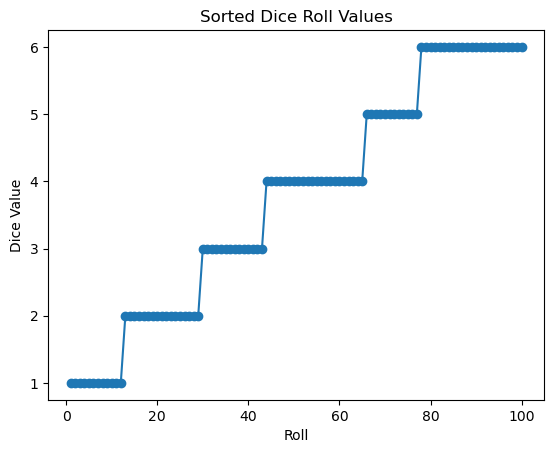

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('roll_the_dice_hundred.csv')

# Sort the values
sorted_values = df['value'].sort_values()

# Plot the sorted values
plt.plot(range(1, len(sorted_values) + 1), sorted_values, marker='o')
plt.xlabel('Roll')
plt.ylabel('Dice Value')
plt.title('Sorted Dice Roll Values')
plt.show()

In [ ]:
In this code, we first import the necessary libraries: pandas for reading the CSV file and matplotlib.pyplot for plotting the values.

Next, we use the pd.read_csv() function to read the CSV file "roll_the_dice_hundred.csv" and store it in the DataFrame df.

Then, we sort the values in the 'value' column using the sort_values() method and save the sorted values in the sorted_values variable.

Finally, we plot the sorted values using plt.plot(), specifying the x-axis values as a range from 1 to the length of the sorted values, and the y-axis values as the sorted values themselves. We set the marker style to 'o' to indicate the individual data points, and provide labels for the axes and a title for the plot using plt.xlabel(), plt.ylabel(), and plt.title().

When you run this code, it will plot the sorted dice roll values. The x-axis represents the roll number, while the y-axis represents the corresponding dice value. The plot will show the trend of the dice values as the rolls progress, allowing you to observe any patterns or distribution characteristics in the sorted values.

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [29]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('roll_the_dice_hundred.csv')

# Extract the 'value' column
data = df['value'].tolist()

# Calculate the mean using one of the functions defined earlier
mean = calculate_mean(data)

print("Mean:", mean)

Mean: 3.74


#### 3.- Now, calculate the frequency distribution.


In [33]:
import pandas as pd
from collections import Counter

# Read the CSV file
df = pd.read_csv('roll_the_dice_hundred.csv')

# Extract the 'value' column
data = df['value'].tolist()

# Calculate the frequency distribution
freq_dist = Counter(data)

# Print the frequency distribution
print("Frequency Distribution:")
for value, frequency in freq_dist.items():
    print(f"Value {value}: Frequency {frequency}")


Frequency Distribution:
Value 1: Frequency 12
Value 2: Frequency 17
Value 6: Frequency 23
Value 5: Frequency 12
Value 4: Frequency 22
Value 3: Frequency 14


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

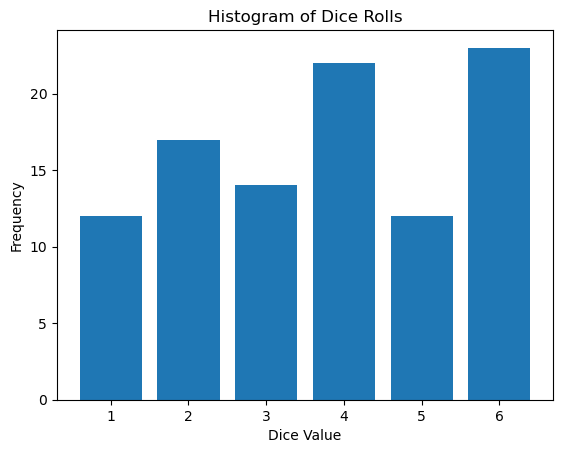

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('roll_the_dice_hundred.csv')

# Extract the 'value' column
data = df['value'].tolist()

# Plot the histogram
plt.hist(data, bins=range(1, 8), align='left', rwidth=0.8)
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.title('Histogram of Dice Rolls')
plt.show()

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

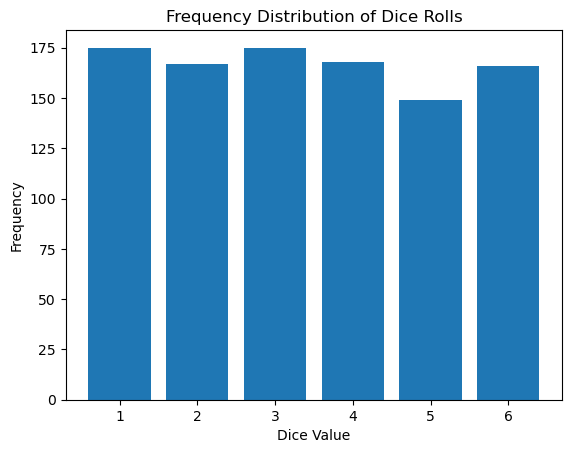

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('roll_the_dice_thousand.csv')

# Extract the 'value' column
data = df['value'].tolist()

# Calculate the frequency distribution
freq_dist = pd.Series(data).value_counts().sort_index()

# Plot the frequency distribution
plt.bar(freq_dist.index, freq_dist.values)
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Dice Rolls')
plt.show()

In [ ]:
"""
your comments here
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

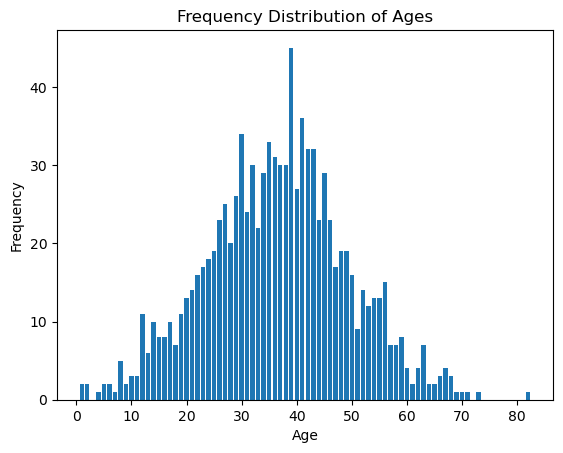

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('ages_population.csv')

# Get the column dynamically
age_column = df.columns[0]

# Extract the age column
ages = df[age_column].tolist()

# Calculate the frequency distribution
freq_dist = pd.Series(ages).value_counts().sort_index()

# Plot the frequency distribution
plt.bar(freq_dist.index, freq_dist.values)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Ages')
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [50]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('ages_population.csv')

# Print the column names
print(df.columns)

# Extract the correct column name and assign it to age_column
age_column = 'observation'

# Extract the age column
ages = df[age_column]

# Calculate the mean
mean = ages.mean()

# Calculate the standard deviation
std = ages.std()

print("Mean:", mean)
print("Standard Deviation:", std)


Index(['observation'], dtype='object')
Mean: 36.56
Standard Deviation: 12.816499625976762


In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

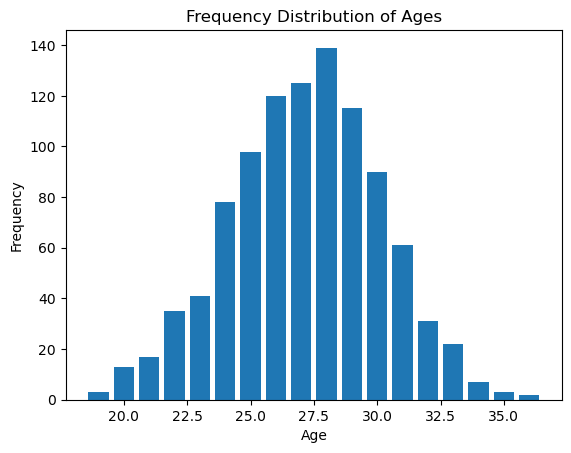

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('ages_population2.csv')

# Extract the 'age' column
ages = df['observation'].tolist()

# Calculate the frequency distribution
freq_dist = pd.Series(ages).value_counts().sort_index()

# Plot the frequency distribution
plt.bar(freq_dist.index, freq_dist.values)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Ages')
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [55]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('ages_population2.csv')

# Extract the 'age' column
ages = df['observation']

# Calculate the mean
mean = ages.mean()

# Calculate the standard deviation
std = ages.std()

print("Mean:", mean)
print("Standard Deviation:", std)


Mean: 27.155
Standard Deviation: 2.969813932689186


In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

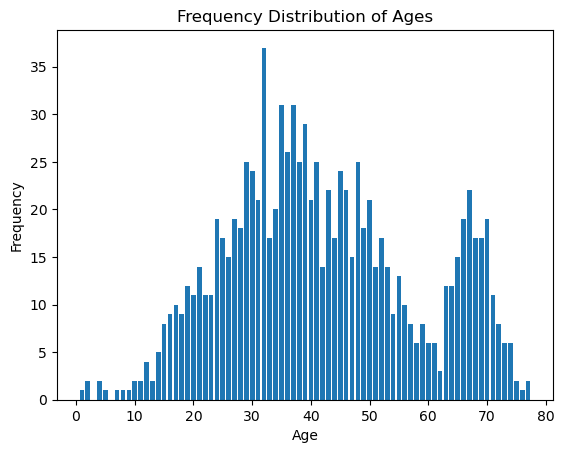

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('ages_population3.csv')

# Extract the 'age' column
ages = df['observation'].tolist()

# Calculate the frequency distribution
freq_dist = pd.Series(ages).value_counts().sort_index()

# Plot the frequency distribution
plt.bar(freq_dist.index, freq_dist.values)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Ages')
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [61]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('ages_population3.csv')

# Extract the 'age' column
ages = df['observation']

# Calculate the mean
mean = ages.mean()

# Calculate the standard deviation
std = ages.std()

print("Mean:", mean)
print("Standard Deviation:", std)

Mean: 41.989
Standard Deviation: 16.144705959865934


In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [62]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('ages_population3.csv')

# Extract the 'age' column
ages = df['observation']

# Calculate the quartiles
q1 = np.percentile(ages, 25)
q2 = np.percentile(ages, 50)
q3 = np.percentile(ages, 75)
q4 = np.percentile(ages, 100)

print("Q1:", q1)
print("Q2 (Median):", q2)
print("Q3:", q3)
print("Q4 (Maximum):", q4)


Q1: 30.0
Q2 (Median): 40.0
Q3: 53.0
Q4 (Maximum): 77.0


In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [63]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('ages_population3.csv')

# Extract the 'age' column
ages = df['observation']

# Calculate additional percentiles
percentiles = [10, 20, 30, 40, 60, 70, 80, 90]

values = np.percentile(ages, percentiles)

for i, p in enumerate(percentiles):
    print("P{}: {}".format(p, values[i]))

P10: 22.0
P20: 28.0
P30: 32.0
P40: 36.0
P60: 45.0
P70: 50.0
P80: 57.0
P90: 67.0


In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""